In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Вычисление числа $π$

## Входные параметры и работа с ними

### Обработка:
  1. Считать переданные значения кол-ва потоков и общего числа попыток.
  2. Создать массив потоков `thread_handles` размером равным переданному `threads`.
  3. Создать массив структур для каждого потока - `thread_data`
  4. Вычислить целое число попыток - $\text{trials_per_thread} = \frac{\text{trials}}{\text{threads}}$.
  5. Вычислить остаточное кол-во попыток - $\text{reminder_trials} = \text{trials % threads}$.

## Алгоритм для вычисления числа $\pi$

1. **Объявление:**
  1. Объявить структуру `ThreadData`, которая будет хранить внутри себя кол-во попыток, которые должен совершить каждый поток, и кол-во попаданий в окружность.

2. **Определение функции `monte_carlo_pi`:**
  1. Записать для каждого потока .
  2. Получить переданную информацию для потока и сохранить ее в `data`.
  3. Инициализировать для потока начальное кол-во попаданий равным 0.
  4. Совершить определенное кол-во попыток попасть в окружность, которое задано для каждого потока:
    1. Сгенерировать случайные координаты $(x, y)$ в диапазоне от 0 до 1.
    2. Проверить, попадает ли полученная точка в единичную окружность: если $x^2 + y^2 < 1$, увеличить счетчик попаданий для потока - `data->hits`.

3. **Работа с потоками:**
  1. Равномерно распределяем попытки на каждый поток, используя формулу - $\text{trials_per_thread + (reminder_trials-- > 0 ? 1 : 0)}$
  2. Запускаем каждый поток для определения кол-ва попаданий в единичную окружность.

4. **Ожидание завершения потоков:**
   1. Для каждого потока в массиве `thread_handles`, дождаться его завершения.
   2. Увеличить счетчик попаданий в единичную окружность на значение попаданий у выполненного потока - `thread_data[i].hits`

5. **Вывод полученного значения:**
   1. Вычислить число $π$ по формуле $π = 4 \times \frac{\text{total_hits}}{\text{trials}}$.
   2. Вывести значение числа $π$ и время выполнения.
   3. Вывести значения затраченного времени на вычисление числа $π$.

6. **Завершение:**
   1. Освободить память, занятую под потоки и их данные.

## Результаты выполнения программы

In [ ]:
df = pd.read_csv('monte_carlo.csv', sep=',', names=['threads', 'trials', 'pi_number', 'time'])

In [ ]:
nthreads_list = [1, 2, 4, 6, 8, 12, 16, 32]
ntrials_list = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

### Зависимость времени работы программы от кол-ва заданных точек при разном кол-ве потоков

Посмотрим на графике зависимость затраченного времени от кол-ва затраченных попыток для значений $\text{p} ∈ \text{{1, 2, 4, 6, 8, 12, 16, 32}}$

[]

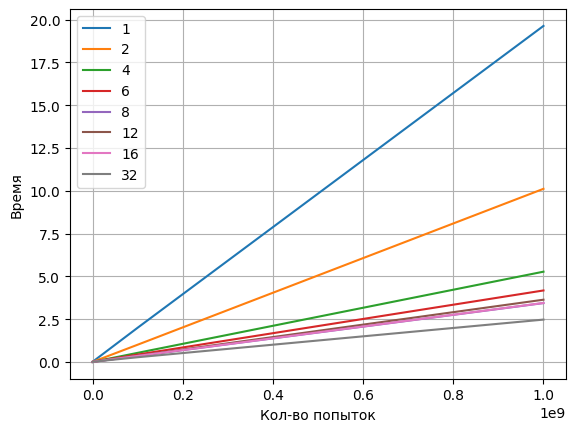

In [ ]:
plt.grid(True)
for threads in nthreads_list:
  plt.plot(df[df['threads'] == threads]['trials'], df[df['threads'] == threads]['time'])

plt.legend(nthreads_list)
plt.xlabel('Кол-во попыток')
plt.ylabel('Время')
plt.plot()

### Время выполнения программы при разном кол-во потоков и заданных точек

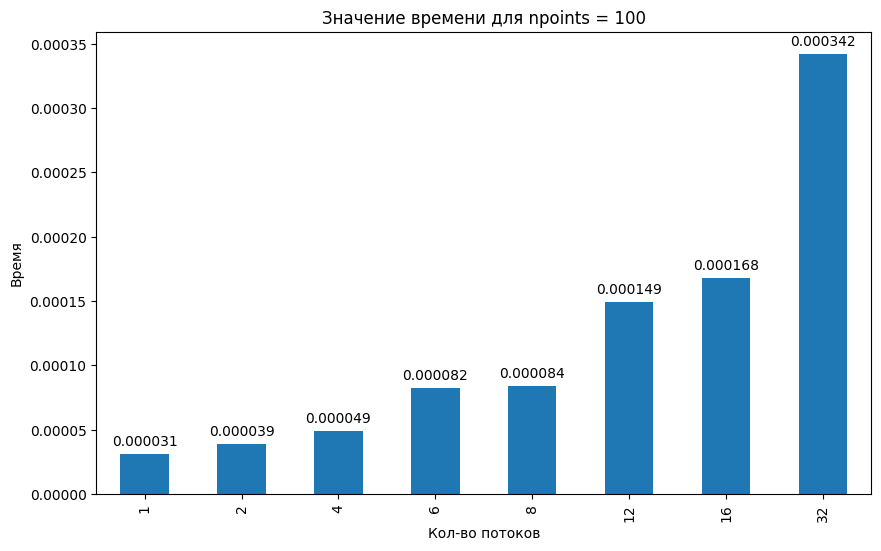

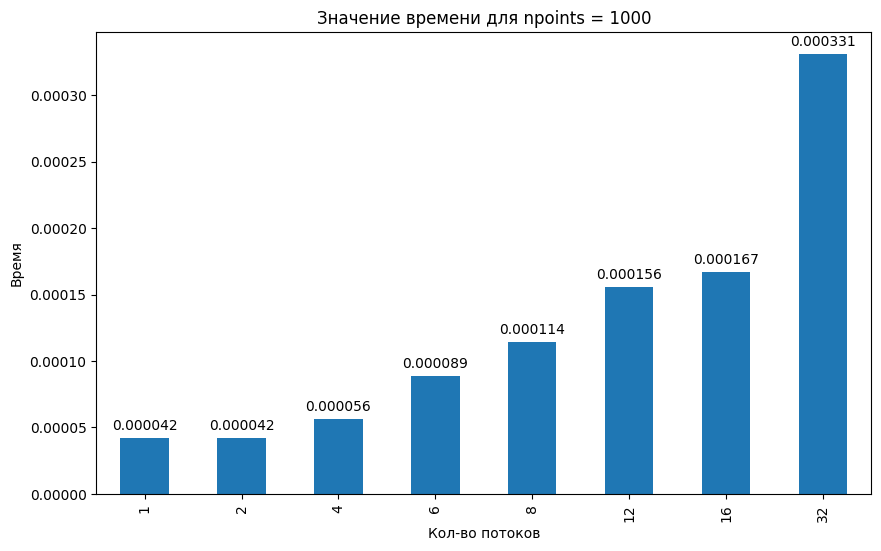

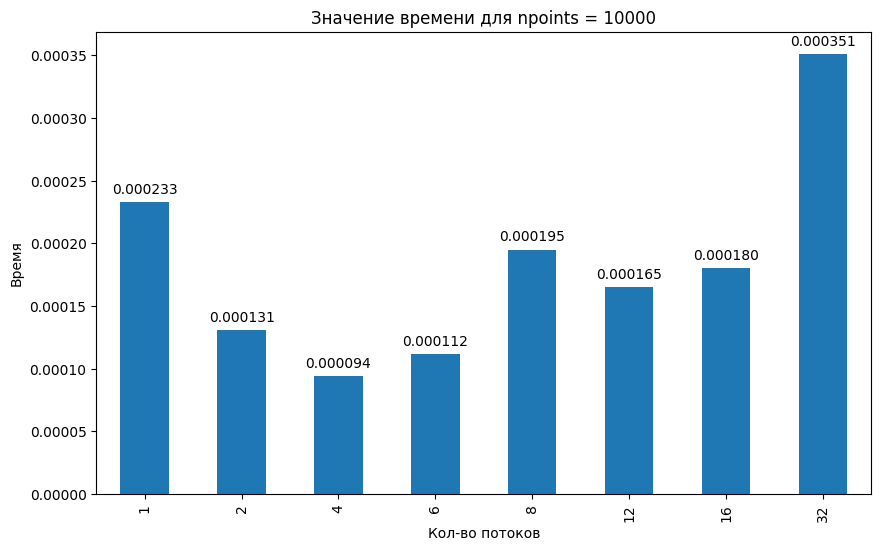

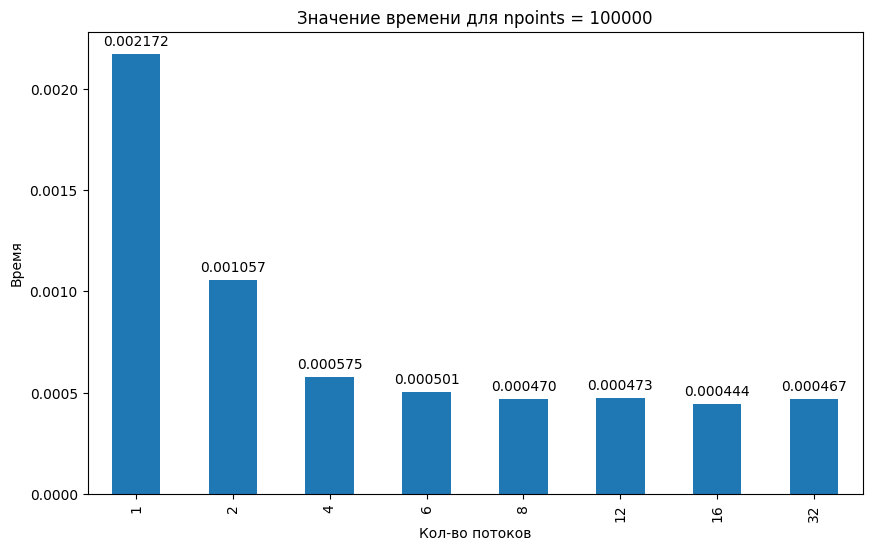

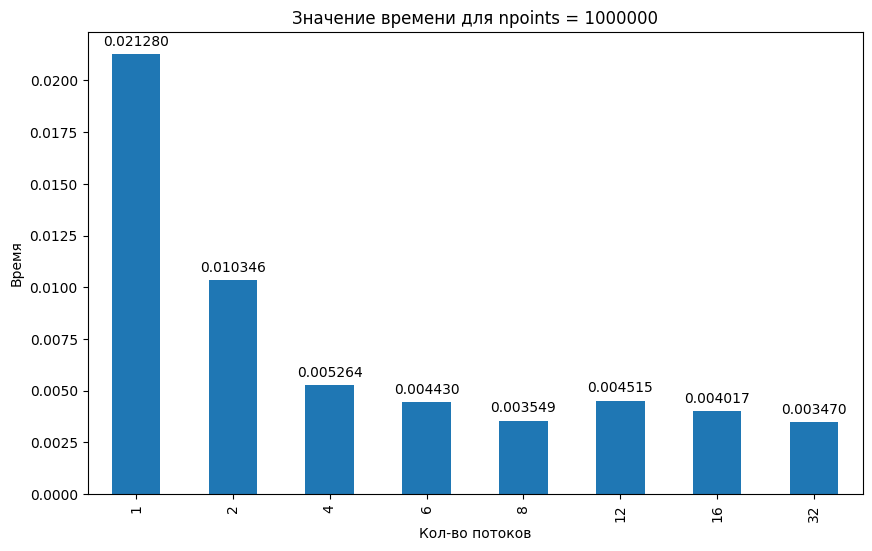

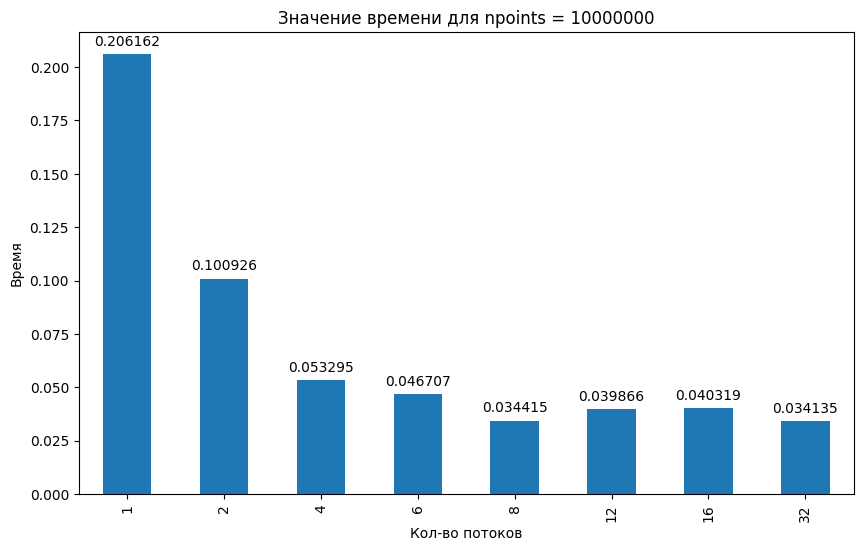

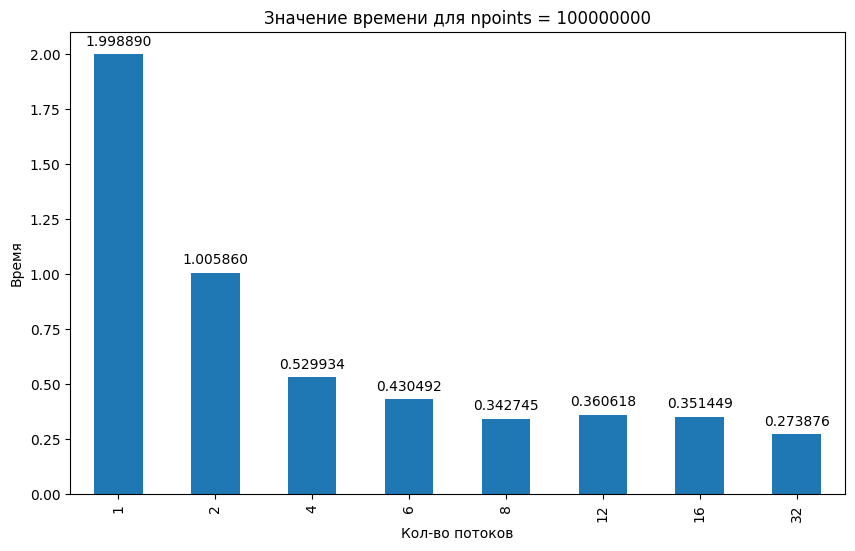

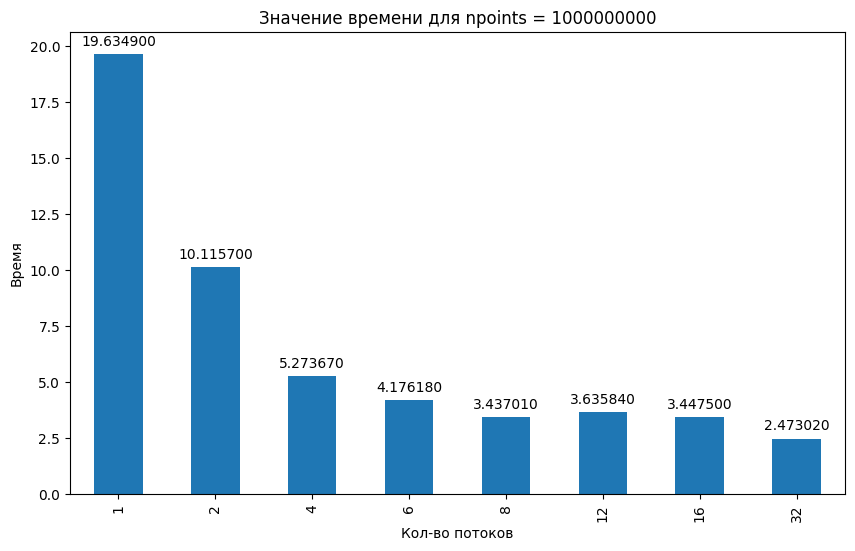

In [ ]:
for ntrials in ntrials_list:
    subset = df[df['trials'] == ntrials]

    plt.figure()
    plt.grid(True)

    ax = subset.groupby('threads')['time'].mean().plot(kind='bar', figsize=(10, 6))

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.6f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    plt.title(f'Значение времени для npoints = {ntrials}')
    plt.xlabel('Кол-во потоков')
    plt.ylabel('Время')

    plt.show()

## Подсчет ускорения и эффективности программы в зависимости от кол-ва потоков

### Определим значения, которые потребуются для вычисления ускорения и эффективности

$\text{p}$ - число потоков, используемых для вычислений.

$T_{\text{serial}}$ - время работы программы, полученное при использовании одного потока (без распараллеливания).

$T_{\text{parallel}}$ - время работы программы, полученное при использовании $\text{p} > 0$ .

***Ускорение***
$$\text{Acceleration} = \frac{T_{\text{serial}}}{T_{\text{parallel}}}$$

***Эффективность***
$$\text{Efficient} = \frac{T_{\text{serial}}}{p × T_{\text{parallel}}}$$

### Подсчет ускорения и эффективности программы

***Функция подсчета ускорения***

In [ ]:
def calculate_acceleration(data: pd.DataFrame) -> pd.DataFrame:
  data = data.copy()
  mask = data['threads'] == 1

  exec_serial_time = pd.concat([data[mask]['time']] * 13, ignore_index=True)
  exec_parallel_time = data['time']

  data['acceleration'] = exec_serial_time / exec_parallel_time

  return data

***Функция подсчета эффективности***

In [ ]:
def calculate_efficient(data: pd.DataFrame) -> pd.DataFrame:
  data = data.copy()
  mask = data['threads'] == 1

  numerator = pd.concat([data[mask]['time']] * 13, ignore_index=True)
  denominator = data['time'] * data['threads']

  data['efficient'] = numerator / denominator

  return data

In [ ]:
acceleration_data = calculate_acceleration(df)
efficient_data = calculate_efficient(df)

### Графики зависимости ускорения и эффективности от кол-ва точек и потоков

**График ускорения**


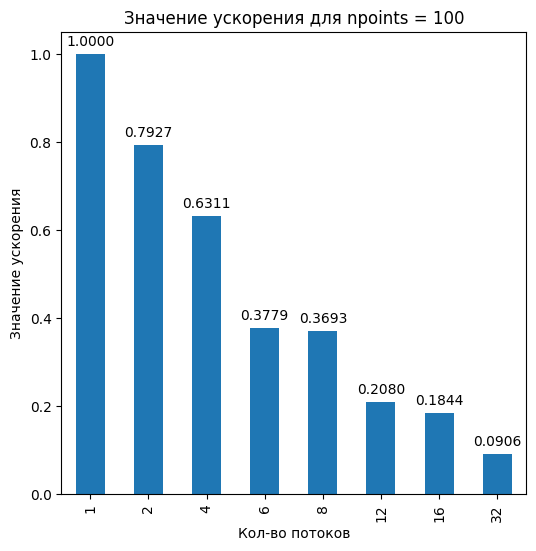

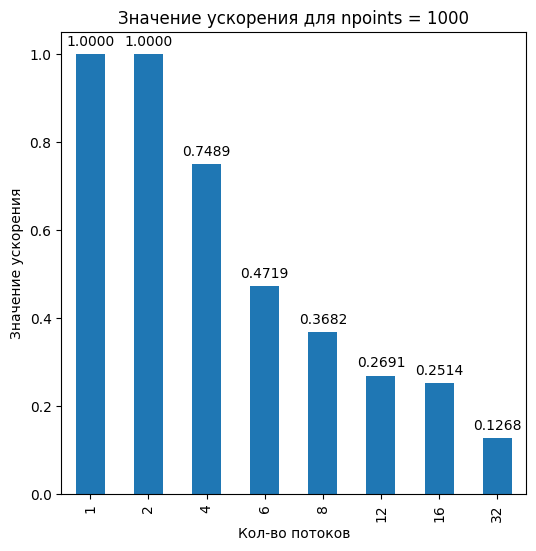

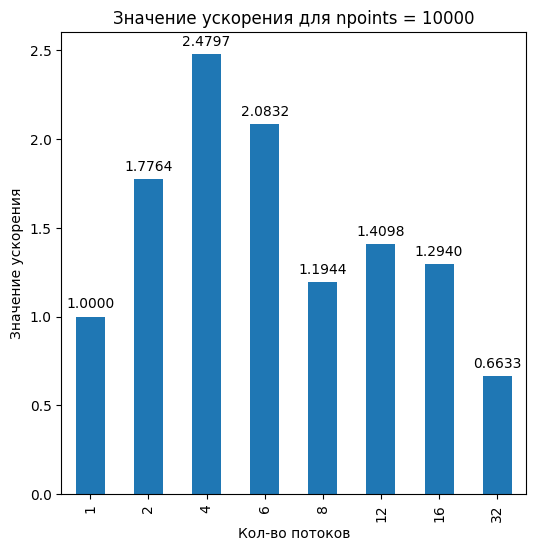

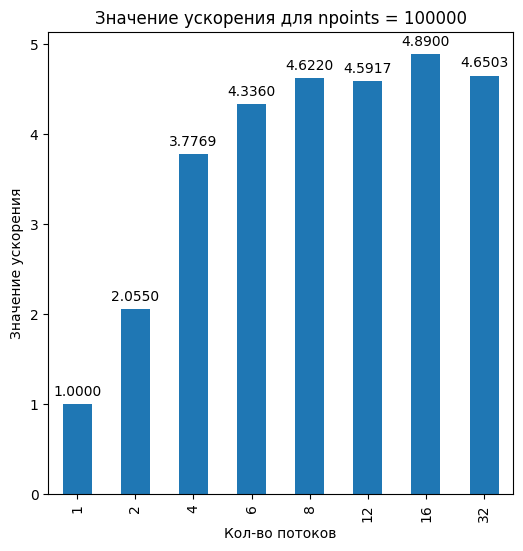

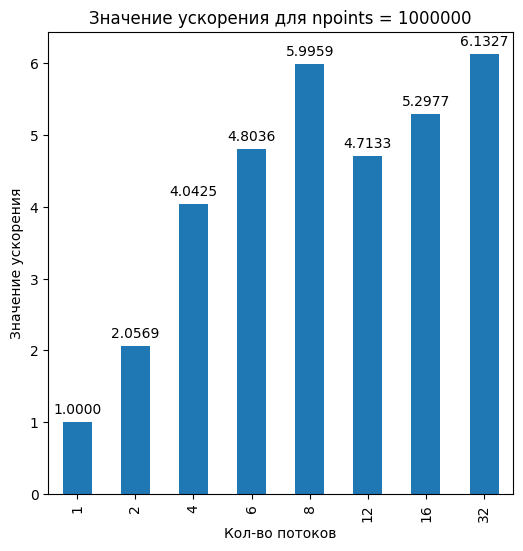

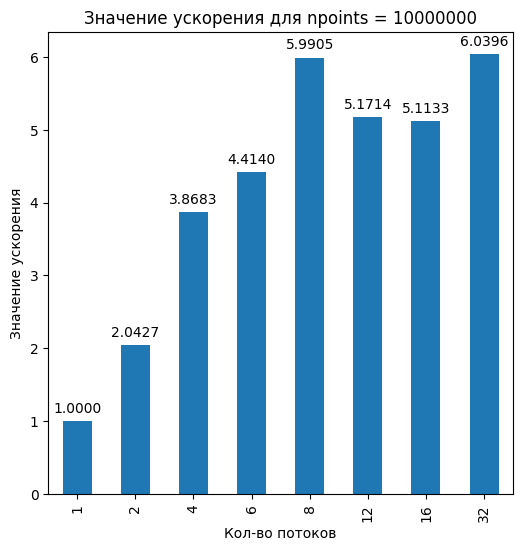

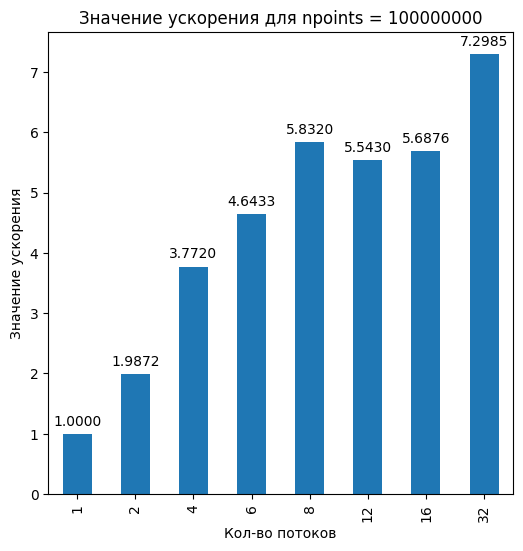

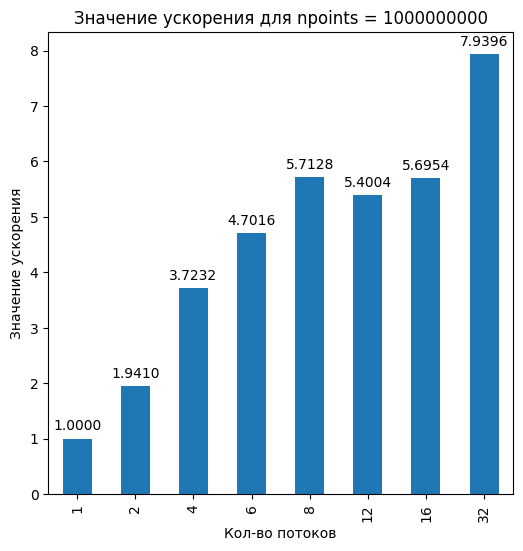

In [ ]:
for ntrials in ntrials_list:
    subset = acceleration_data[acceleration_data['trials'] == ntrials]

    plt.figure()
    plt.grid(True)

    ax = subset.groupby('threads')['acceleration'].mean().plot(kind='bar', figsize=(6, 6))

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.4f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    plt.title(f'Значение ускорения для npoints = {ntrials}')
    plt.xlabel('Кол-во потоков')
    plt.ylabel('Значение ускорения')

    plt.show()

**График эффективности**


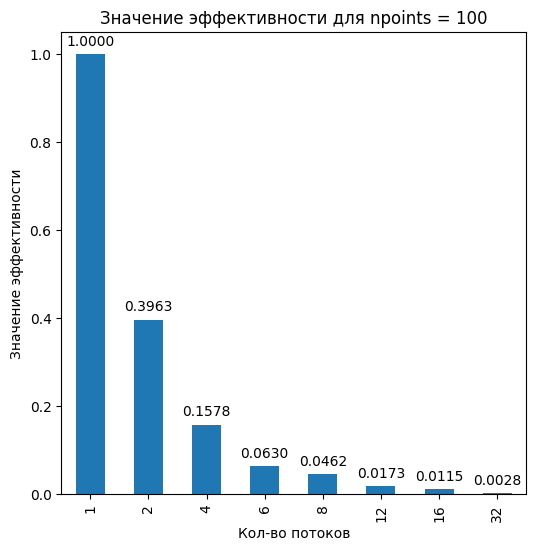

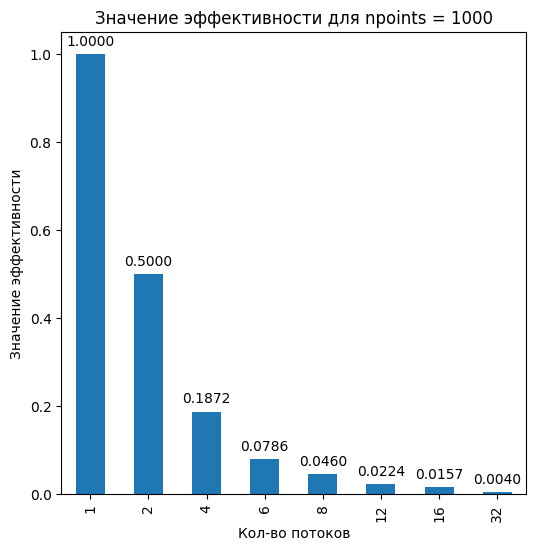

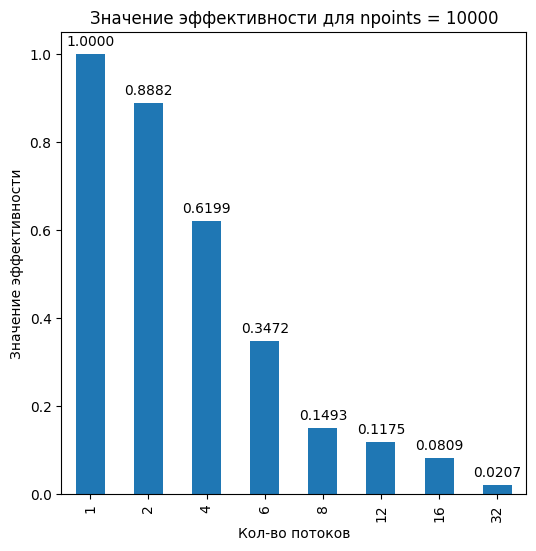

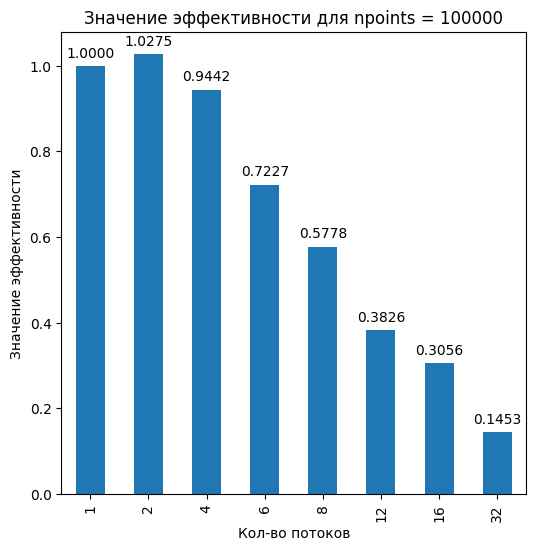

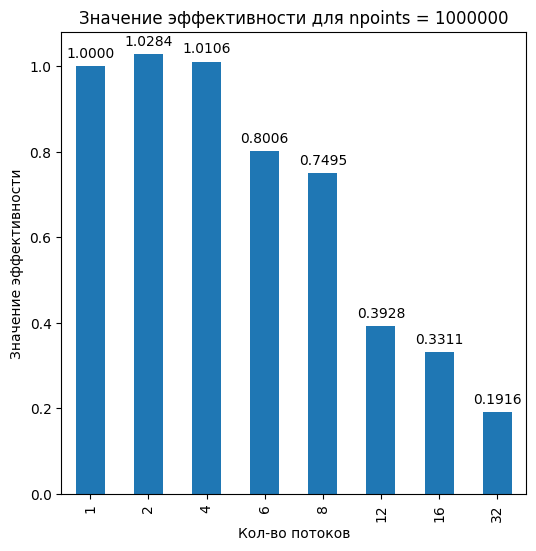

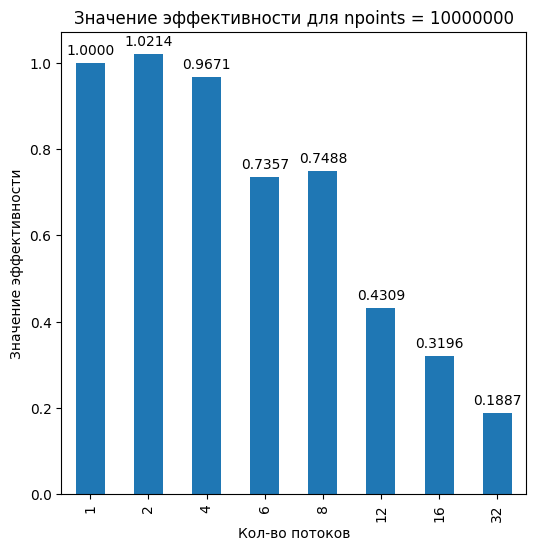

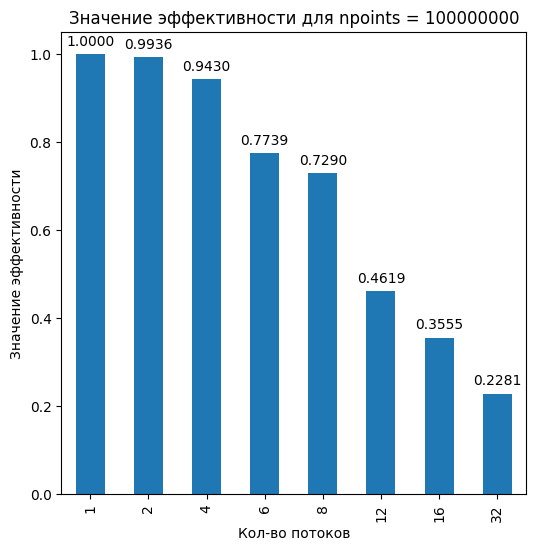

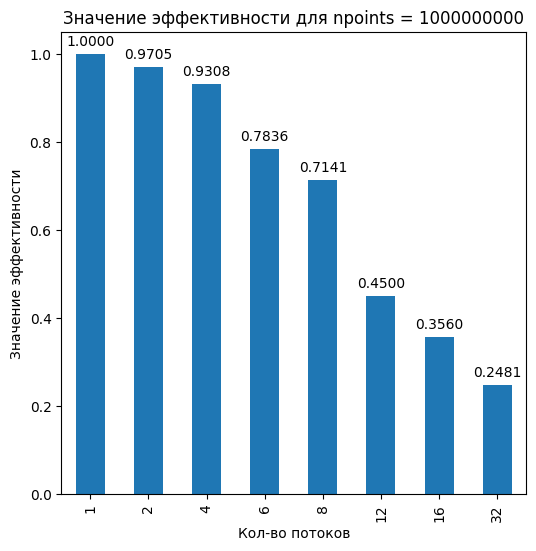

In [ ]:
for ntrials in ntrials_list:
    subset = efficient_data[efficient_data['trials'] == ntrials]

    plt.figure()
    plt.grid(True)

    ax = subset.groupby('threads')['efficient'].mean().plot(kind='bar', figsize=(6, 6))

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.4f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    plt.title(f'Значение эффективности для npoints = {ntrials}')
    plt.xlabel('Кол-во потоков')
    plt.ylabel('Значение эффективности')

    plt.show()

# Генерация множества Мандельброта

## Входные параметры и работа с ними

1. **Обработка:**
  1. Зачитать переданные значения кол-ва потоков и общего числа точек.
  2. Создать массив потоков `threads` размером равным переданному `nthreads`.
  3. Создать массив структур для каждого потока - `threadData`
  4. Созадать массив комплексных чисел, который будет хранить в себе числа, принадлежащие мн-ву Мандельброта - `points`
  5. Вычислить целое число попыток - $\text{points_per_thread} = \frac{\text{npoints}}{\text{nthreads}}$.
  6. Вычислить остаточное кол-во попыток - $\text{reminder_points} = \text{npoints % nthreads}$.

## Описание алгоритма генерации мн-ва Мандельброта

1. **Объявление:**
  1. Глобально объявить `mutex` для защищенного доступа к массиву `points`
  2. Объявить структуру `ThreadData`, которая будет хранить внутри себя кол-во попыток, которые должен совершить каждый поток, и указатель на массив с точками, которые принадлежат мн-ву Мандельброта.

2. **Определение функции `is_in_mondelbrot`:**
  1. Установить начальное значения для $z = 0 \Rightarrow \text{Re}\ z_0 = 0, \text{Im}\ z_0 = 0$ и аналогично $\text{temp} = 0$.
  2. Пока не достигли лимита в `max_iter` вычисляем значение $z_{n + 1}$ и проверяем принадлежит ли сгенерированная точка мн-ву Мандельброта:
    1. Вычисляем значение $z_{n + 1}$ по формуле:
      \begin{equation*}
        Z_{n + 1} =
        \begin{cases}
          \text{Re} \ Z_{n+1} = (\text{Re} \ Z_{n})^2 - (\text{Im} \ Z_{n})^2 + \text{Re} \ c \\
          \text{Im} \ Z_{n+1} = 2 × \text{Re} \ Z_{n} × \text{Im} \ Z_{n} + \text{Im} \ c
        \end{cases}
      \end{equation*}
      
    2. Если $|z_{n}| >= 2$, то точка не принадлжет мн-ву Мандельброта и мы переходим к генерации и проверке следующей точки.

3. **Определение функции `calculate_mandelbrot`:**
  1. Зачитываем входные параметры.
  2. Итеративно генерируем случайные $x = \text{Re} \ c$ и $y = \text{Im} \ c$ в заданных границах.
  3. Проверяем для каждой сгенерированной точки принадлежит ли она мн-ву Мандельброта:
    1. Если принадлежит, то блокируем `mutex` и добавляем точку в массив `points`.
    2. Разблокировываем `mutex`.

4. **Работа с потоками:**
  1. Равномерно распределяем кол-во точек на каждый поток, используя формулу - $\text{points_per_thread + (reminder_points-- > 0 ? 1 : 0)}$.
  2. Для каждого потока ссылаемся на массив с точками - `points`
  3. Запускаем каждый поток для генерации мн-ва Мандельброта.

5. **Ожидание завершения потоков:**
   1. Для каждого потока в массиве `thread_handles`, дождаться его завершения.

6. **Запись в файл**
  1. Записываем сгенерированные точки, принадлежащие мн-ву Мандлеброта, из `points` в файл `mandelbrot_points.csv`

7. **Завершение:**
   1. Освободить память, занятую под потоки и их данные.
   2. Уничтожить `mutex`.

## Полученные результаты выполнения

In [ ]:
df = pd.read_csv('mandelbrot.csv', sep=',', names=['threads', 'points', 'time'])
df_points = pd.read_csv('mandelbrot_points.csv', sep=',', names=['real', 'imaginary'])

In [ ]:
ntrials_list = [100, 1000, 10000, 100000, 1000000]
nthreads_list = [1, 2, 4, 8, 16, 32, 64]

### График, полученный по сгенерированным точкам

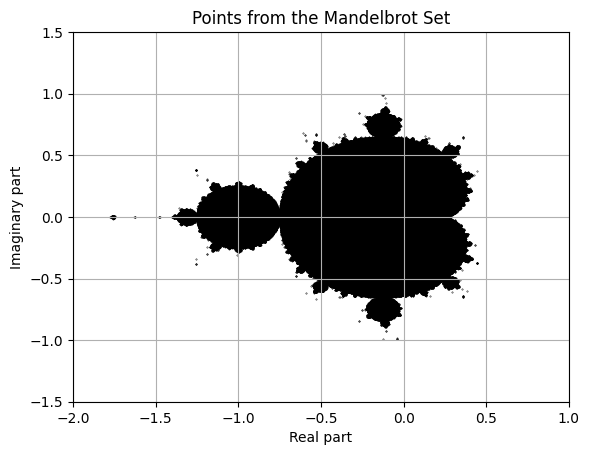

In [ ]:
plt.grid(True)
plt.scatter(df_points['real'], df_points['imaginary'], color='black', s=0.1)

plt.xlim(-2, 1)
plt.ylim(-1.5, 1.5)

plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.title('Points from the Mandelbrot Set')

plt.show()

### Зависимость времени работы программы от кол-ва заданных точек при разном кол-ве потоков

[]

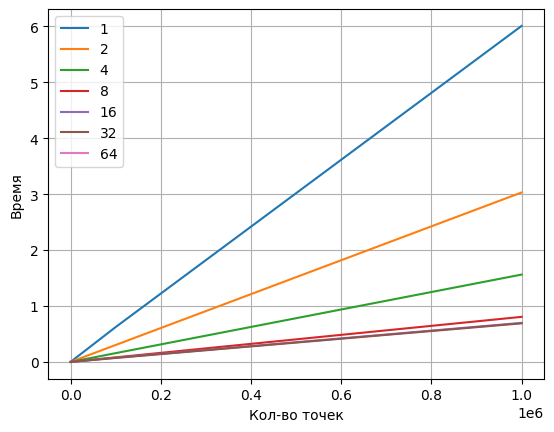

In [ ]:
plt.grid(True)
for threads in nthreads_list:
  plt.plot(df[df['threads'] == threads]['points'], df[df['threads'] == threads]['time'])

plt.legend(nthreads_list)
plt.xlabel('Кол-во точек')
plt.ylabel('Время')
plt.plot()

### Время выполнения программы при разном кол-во потоков и заданных точек

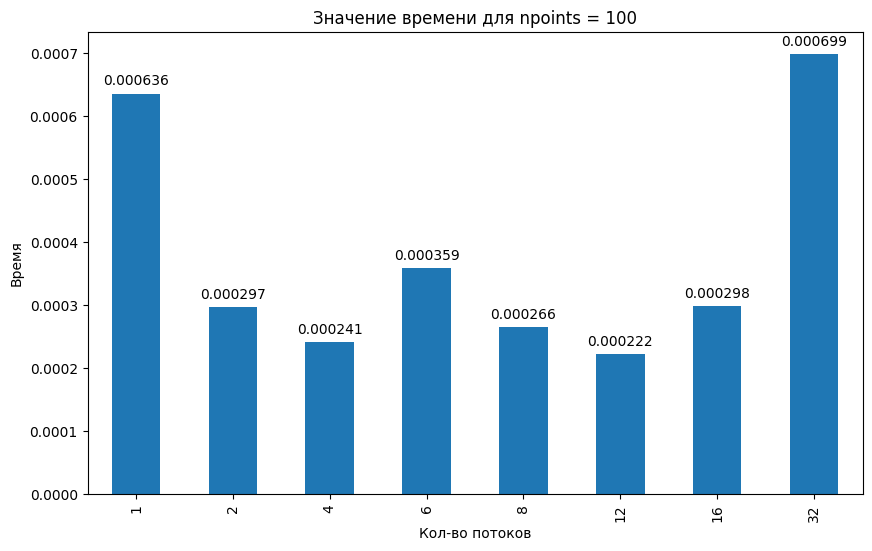

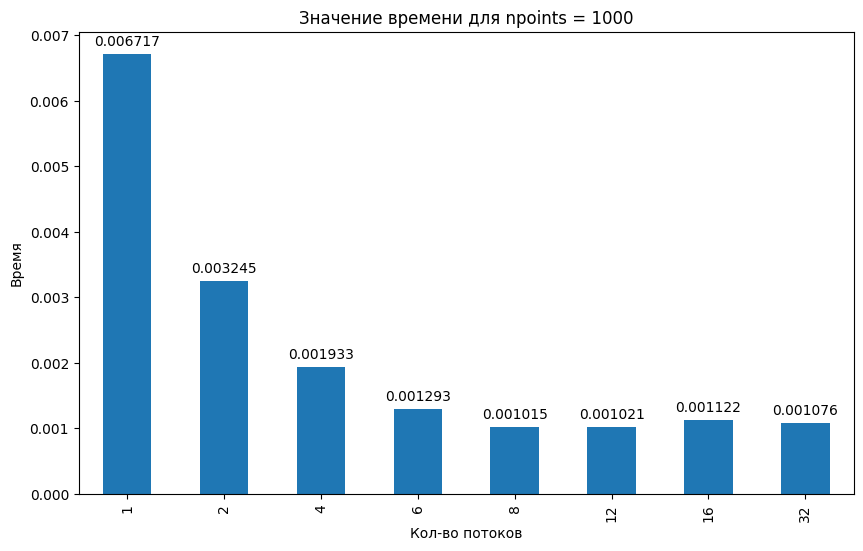

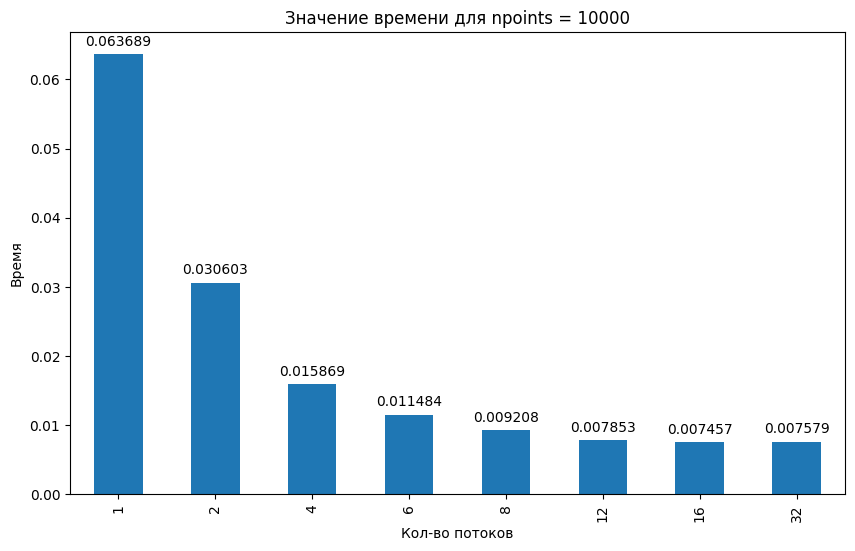

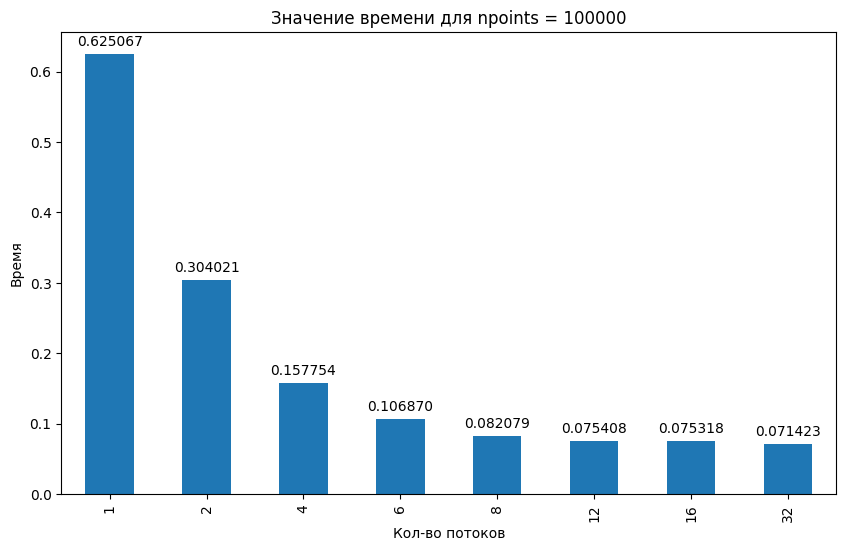

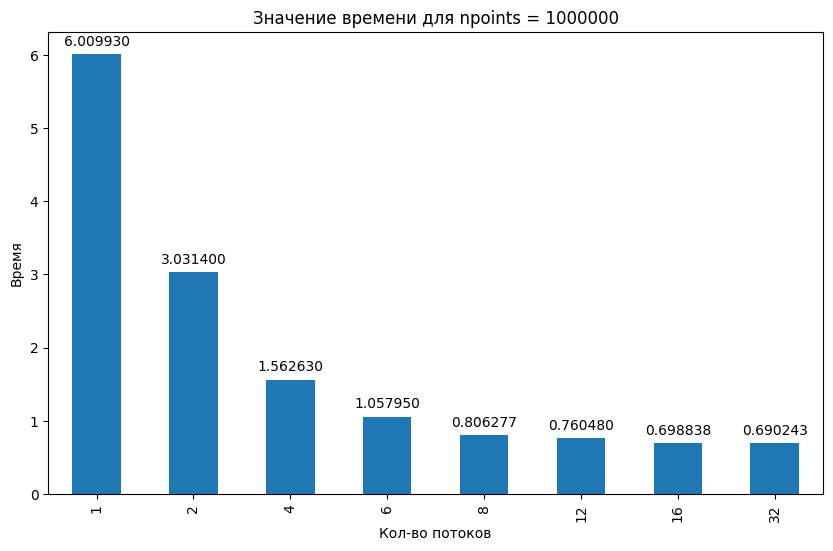

In [ ]:
for ntrials in ntrials_list:
    subset = df[df['points'] == ntrials]

    plt.figure()
    plt.grid(True)

    ax = subset.groupby('threads')['time'].mean().plot(kind='bar', figsize=(10, 6))

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.6f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    plt.title(f'Значение времени для npoints = {ntrials}')
    plt.xlabel('Кол-во потоков')
    plt.ylabel('Время')

    plt.show()

## Подсчет ускорения и эффективности программы в зависимости от кол-ва потоков

### Определим значения, которые потребуются для вычисления ускорения и эффективности

$\text{p}$ - число потоков, используемых для вычислений.

$T_{\text{serial}}$ - время работы программы, полученное при использовании одного потока (без распараллеливания).

$T_{\text{parallel}}$ - время работы программы, полученное при использовании $\text{p} > 0$ .

***Ускорение***
$$\text{Acceleration} = \frac{T_{\text{serial}}}{T_{\text{parallel}}}$$

***Эффективность***
$$\text{Efficient} = \frac{T_{\text{serial}}}{p × T_{\text{parallel}}}$$

### Подсчет ускорения и эффективности программы

***Функция подсчета ускорения программы***

In [ ]:
def calculate_acceleration(data: pd.DataFrame) -> pd.DataFrame:
  data = data.copy()
  mask = data['threads'] == 1

  exec_serial_time = pd.concat([data[mask]['time']] * 8, ignore_index=True)
  exec_parallel_time = data['time']

  data['acceleration'] = exec_serial_time / exec_parallel_time

  return data

***Функция подсчета эффективности программы***

In [ ]:
def calculate_efficient(data: pd.DataFrame) -> pd.DataFrame:
  data = data.copy()
  mask = data['threads'] == 1

  numerator = pd.concat([data[mask]['time']] * 8, ignore_index=True)
  denominator = data['time'] * data['threads']

  data['efficient'] = numerator / denominator

  return data

In [ ]:
acceleration_data = calculate_acceleration(df)
efficient_data = calculate_efficient(df)

### Графики зависимости ускорения и эффективности от кол-ва точек и потоков

***Ускорение***

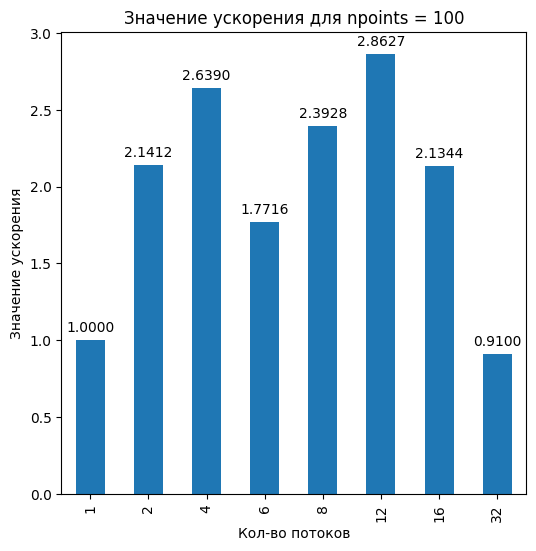

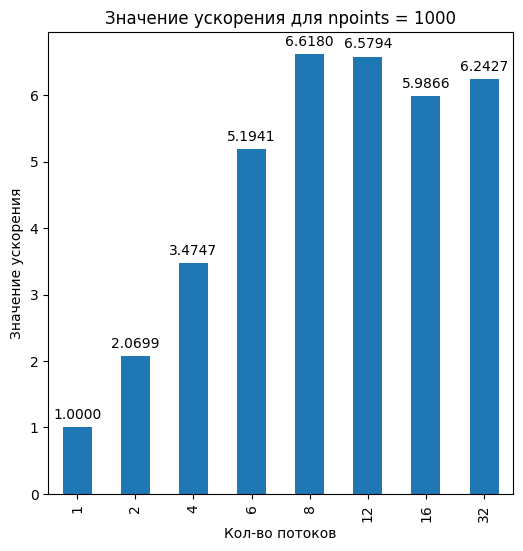

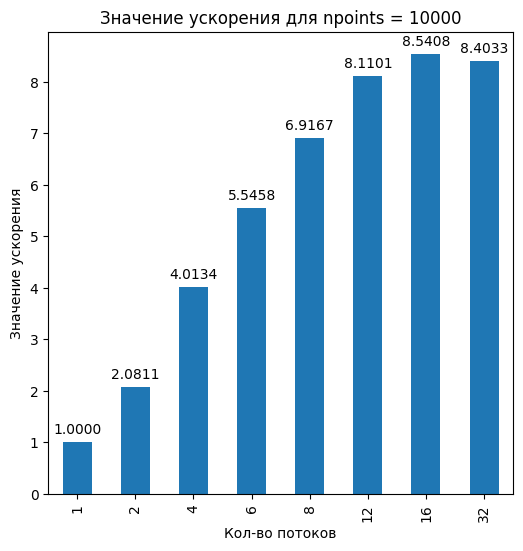

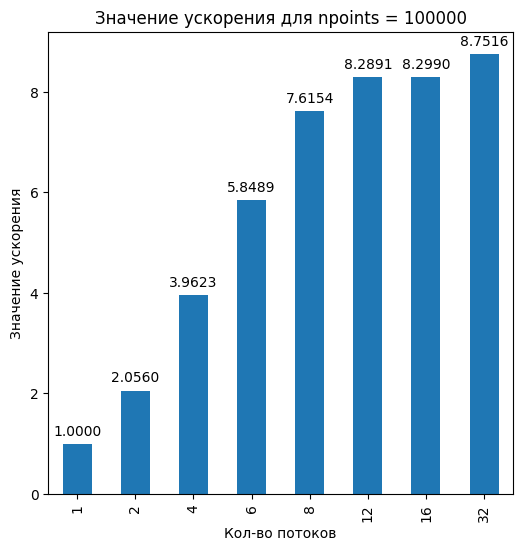

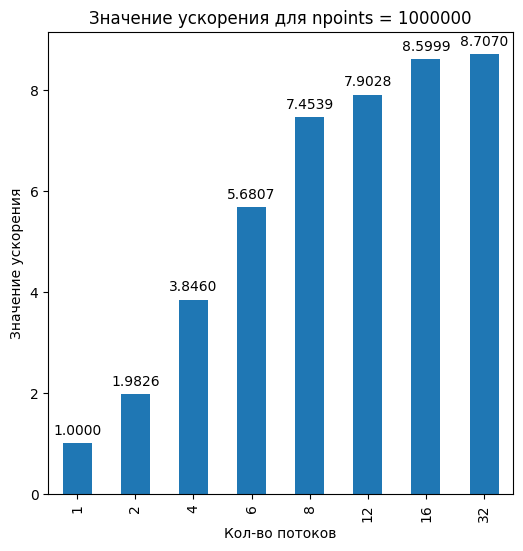

In [ ]:
for ntrials in ntrials_list:
    subset = acceleration_data[acceleration_data['points'] == ntrials]

    plt.figure()
    plt.grid(True)

    ax = subset.groupby('threads')['acceleration'].mean().plot(kind='bar', figsize=(6, 6))

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.4f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    plt.title(f'Значение ускорения для npoints = {ntrials}')
    plt.xlabel('Кол-во потоков')
    plt.ylabel('Значение ускорения')

    plt.show()

***Эффективность***

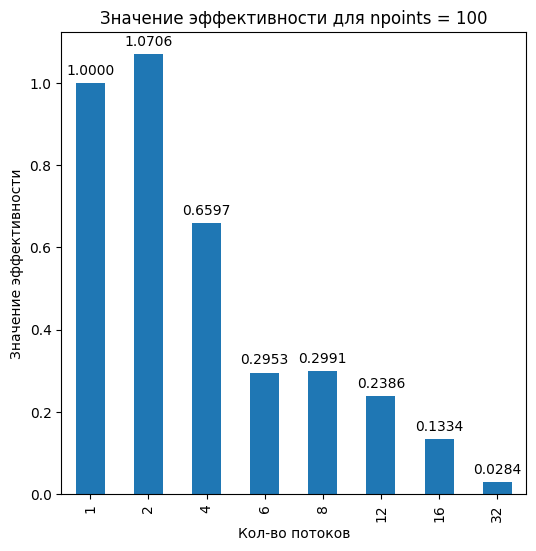

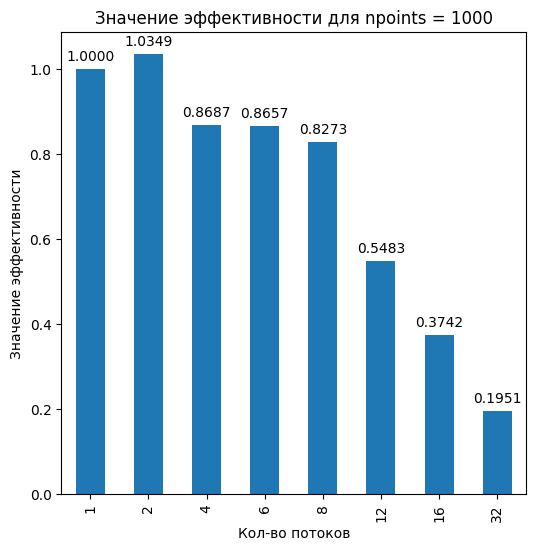

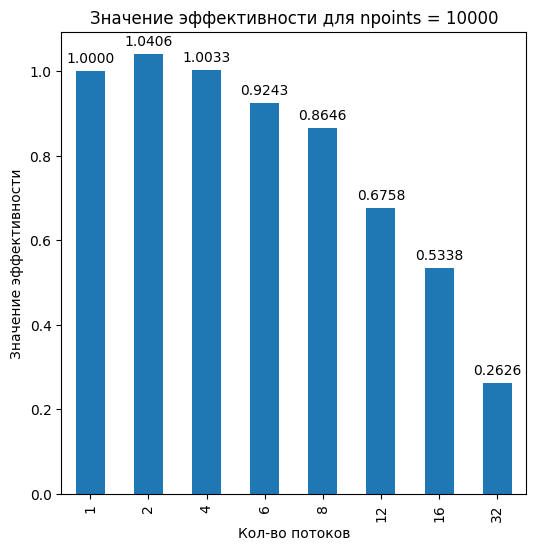

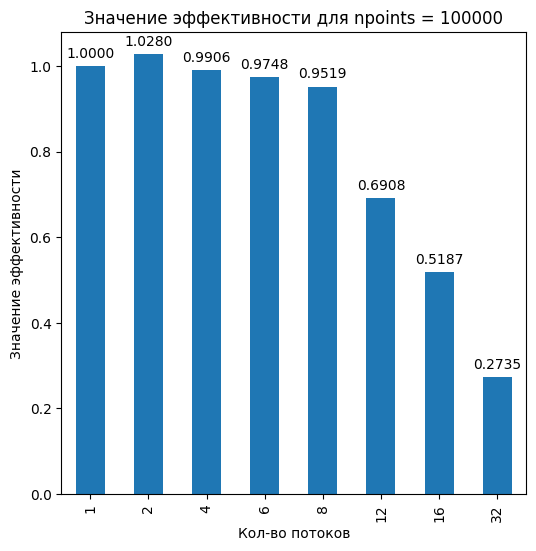

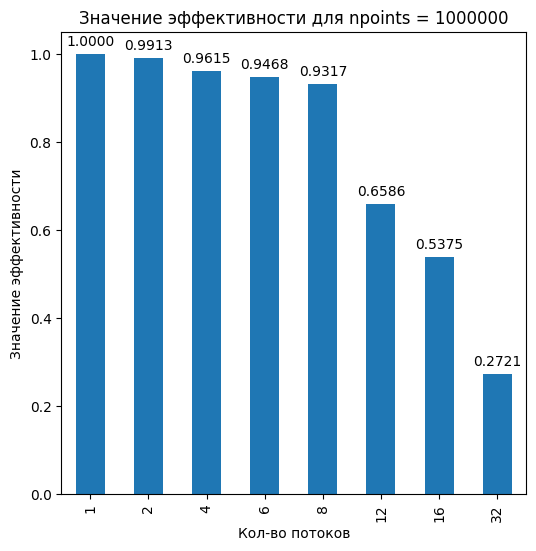

In [ ]:
for ntrials in ntrials_list:
    subset = efficient_data[efficient_data['points'] == ntrials]

    plt.figure()
    plt.grid(True)

    ax = subset.groupby('threads')['efficient'].mean().plot(kind='bar', figsize=(6, 6))

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.4f}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points')

    plt.title(f'Значение эффективности для npoints = {ntrials}')
    plt.xlabel('Кол-во потоков')
    plt.ylabel('Значение эффективности')

    plt.show()

# Алгоритм реализации `rwlock`

1. **Структура `rwlock_type`:**
   - `pthread_mutex_t mutex`: Мьютекс для синхронизации доступа к rwlock.
   - `pthread_cond_t readers`: Условная переменная для читателей.
   - `pthread_cond_t writers`: Условная переменная для писателей.
   - `int readers_counter`: Количество активных читателей.
   - `int reading_block_wait`: Количество ожидающих читателей.
   - `int writing_block_wait`: Количество ожидающих писателей.
   - `int is_writer_blocked`: Флаг, что блокировку получил хотя бы один писатель .

2. **Функция `rwlock_init`:**
     - Создает мьютекс и условные переменные.
     - Устанавливает начальные значения для `readers_counter`, `reading_block_wait`, `writing_block_wait` и `is_writer_blocked` равными 0.

3. **Функция `rwlock_rdlock`:**
     - Блокирует rwlock для чтения.
     - Ждет, если писатель активен или есть ожидающие писатели.
     - Увеличивает счетчик активных читателей после получения блокировки.

4. **Функция `rwlock_wrlock`:**
     - Блокирует rwlock для записи.
     - Увеличивает счетчик ожидающих писателей.
     - Ждет, если есть активные читатели или другой активный писатель.
     - Активирует флаг `writer_active` после получения блокировки.

5. **Функция `rwlock_unlock`:**
     - Разблокирует rwlock.
     - Если писатель был активен, отключает его и оповещает всех ожидающих читателей.
     - Если читатель разблокируется, уменьшает его счетчик и уведомляет ожидающего писателя, если он стал неактивным.

6. **Функция `rwlock_destroy`:**
     - Уничтожает мьютекс и условные переменные.

In [ ]:
##todo

# Выводы

**Ускорение**

Из графиков становится понятно, что ускорение программы при использовании большего кол-ва потоков заметно увеличивается до тех пор, пока кол-во передаваемых потоков не превышает значение физических потоков процессора.

**Эффективность**

Смотря на графики эффективности программы подсчета числа $π$ при использовании различного кол-ва потоков, мы можем заметить, что при увеличении кол-ва потоков их эффективность остается на достаточно низком уровне. По этой причине мы можем сделать вывод, что мы достигаем ограничения на рост производительности при все большем увеличении кол-ва потоков.

При этом для генерации мн-ва Мандельброта эффективность находится на относительно высоком уровне даже для малого кол-ва точек.

**Общие св-ва**
Анализируя графики ускорения и эффективности программ при маленьких значениях точек, а также на их время выполнения, мы можем увидеть, что многопоточные программы работают медленнее, чем простая однопоточная программа.

Однако, если рассматривать графики уже на большом кол-ве точек время работы значительно уменьшается относительно однопоточной программы. При этом эффективность все равно остается на невысоком уровне.
